# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[ 0.76539195, -0.76285682],
        [-0.29017418,  0.59435672],
        [-0.13465503, -2.18936361],
        [-0.83875312,  0.60197527],
        [ 2.26409137,  0.20406959]]),
 array([1, 1, 0, 1, 1]))

In [3]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [4]:
# sampling
n = 5000

Y_generative = np.repeat([1,-1], n)
X_generative = np.zeros((2*n, 2))
X_generative[:n,] = np.random.multivariate_normal(m1, sigma, n)
X_generative[n:,] = np.random.multivariate_normal(m2, sigma, n)

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


$$p(y=1|x) = \frac{p(x|y=1)p(y=1)}{p(x)} = $$
$$\frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1) + p(x|y=-1)p(y=-1)} = $$
$$\frac{\pi p(x|y=1)}{\pi p(x|y=1) + (1-\pi)p(x|y=-1)} = $$
$$\frac{\pi \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}} \exp(-\frac{1}{2}(x-m_1)'\Sigma^{-1}(x-m_1))}{\pi \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}} \exp(-\frac{1}{2}(x-m_1)'\Sigma^{-1}(x-m_1)) + (1-\pi)\frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}} \exp(-\frac{1}{2}(x-m_2)'\Sigma^{-1}(x-m_2))} = $$
$$\frac{\pi \exp(-\frac{1}{2}(x-m_1)'\Sigma^{-1}(x-m_1))}{\pi \exp(-\frac{1}{2}(x-m_1)'\Sigma^{-1}(x-m_1)) + (1-\pi)\exp(-\frac{1}{2}(x-m_2)'\Sigma^{-1}(x-m_2))} = $$
Here, I simplify the fraction (divide by the numerator):

$$\frac{1}{1 + \frac{1-\pi}{\pi}\exp(-\frac{1}{2}(x-m_2)'\Sigma^{-1}(x-m_2))} = $$
$$\frac{1}{1 + \frac{1-\pi}{\pi}\exp(-\frac{1}{2}(x-m_2)'\Sigma^{-1}(x-m_2)+\frac{1}{2}(x-m_1)'\Sigma^{-1}(x-m_1))} = $$
$$\frac{1}{1 + \exp(\log\frac{1-\pi}{\pi}-\frac{1}{2}(x-m_2)'\Sigma^{-1}(x-m_2)+\frac{1}{2}(x-m_1)'\Sigma^{-1}(x-m_1))} = $$
$$\frac{1}{1 + \exp(\log\frac{1-\pi}{\pi}-\frac{1}{2}(x-m_2)'\Sigma^{-1}(x-m_2)+\frac{1}{2}(x-m_1)'\Sigma^{-1}(x-m_1))} = $$

Note that $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$ = $\frac{1}{1 + e^{-\beta_0 - \beta x}}$, therefore, we get that the distribution corresponds to a logistic model with:


$$-\beta_0 = - \log{\frac{1-\pi}{\pi}} - \frac{1}{2}(m_2' \Sigma^{-1}m_2 - m_1'\Sigma^{-1}m_1)$$
$$-\beta = \Sigma^{-1} (m_2-m_1)$$




Finally:

$$\beta_0 = \log{\frac{1-\pi}{\pi}} + \frac{1}{2}(m_2' \Sigma^{-1}m_2 - m_1'\Sigma^{-1}m_1)$$
$$\beta = \Sigma^{-1} (m_1-m_2)$$

#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [5]:
inv_sigma = np.linalg.inv(sigma)
inv_sigma

array([[1.33333333, 0.66666667],
       [0.66666667, 1.33333333]])

In [6]:
# computing beta_0 and beta using the formulas
beta0 = m2.T @ inv_sigma @ m2 - m1.T @ inv_sigma @ m1
beta0

-4.0

In [7]:
beta = inv_sigma @ (m1 - m2)
beta

array([2., 2.])

In [8]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-1.95750452]), array([[1.95599189, 2.01258719]]))

The estimated coefficients are reasonably close to the theoretically calculeted ones.

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [9]:
# sampling
n = 10000
n_successes = np.random.binomial(n, 0.5)

X_disciminative = np.zeros((n, 2))
X_disciminative[:n_successes,] = np.random.multivariate_normal(m1, sigma, n_successes)
X_disciminative[n_successes:,] = np.random.multivariate_normal(m2, sigma, n - n_successes)

beta0 = -2
beta = np.array([2,2])
probs = 1 / (1 + np.exp(-beta0 - X_disciminative @ beta))
Y_discriminative = np.random.binomial(1, probs, n)

In [10]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_disciminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-1.99343686]), array([[1.99279837, 1.9916728 ]]))

#### Second bullet point

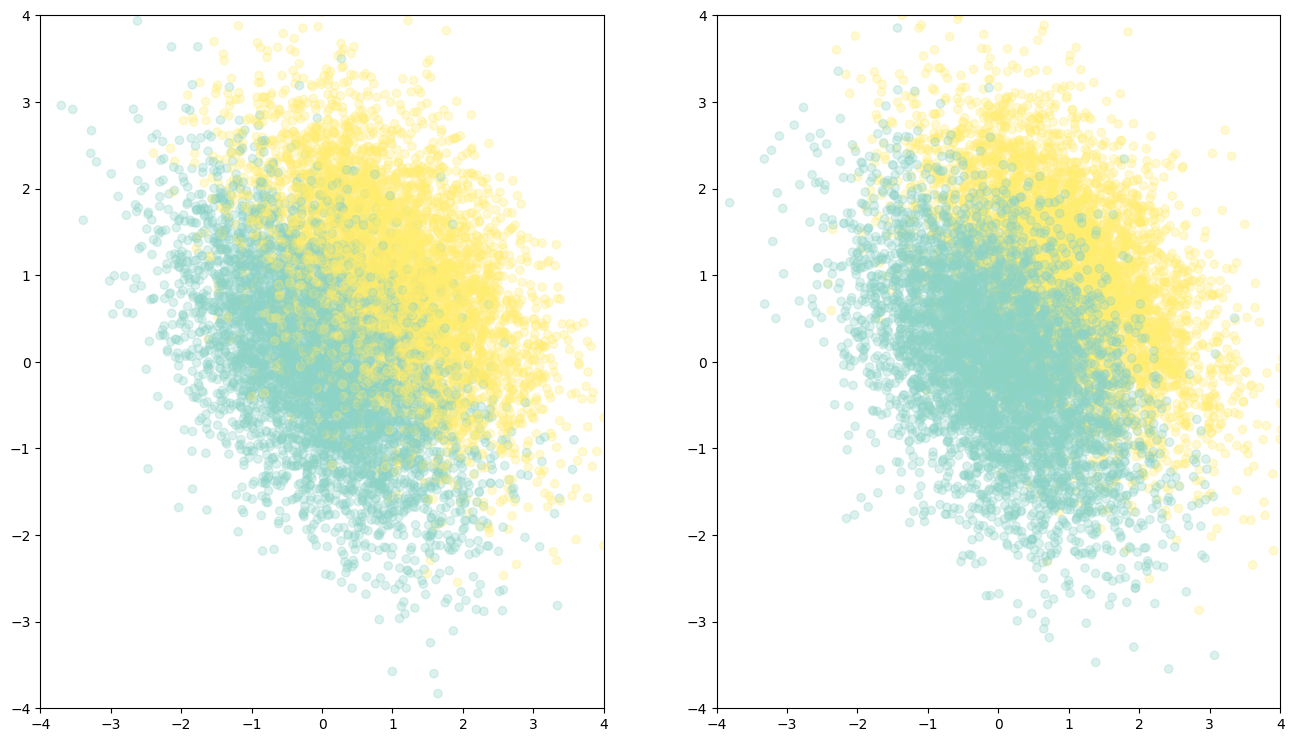

In [11]:
plt.figure(figsize = (16, 9))
plt.subplot(1, 2, 1)
plt.scatter(x = X_disciminative[:,0], y = X_disciminative[:, 1], c=Y_discriminative, alpha=0.3, cmap="Set3")
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_generative[:,0], y = X_generative[:, 1] , c=Y_generative, alpha = 0.3, cmap = "Set3")
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

Both approaches are equivalent. There is a difference in what we get to control directly: in the generative approach betas are hard to obtain, we can't estimate $\pi$, we have to know it, whereas in the discriminative approach $\pi$ can be estimated from the data, but betas are known.

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.


$$p(x|y=-1) = \frac{p(y=-1|x)p(x)}{p(y=-1)}$$

$$p(x|y=-1) = \frac{p(y=-1|x)(p(x|y = 1)\pi + p(x|y=-1)(1-\pi))}{1-\pi}$$

$$p(x|y=-1) - p(y=-1|x)p(x|y=-1) = \frac{p(y=-1|x)p(x|y = 1)\pi}{1-\pi}$$

$$p(x|y=-1)(1 - p(y=-1|x)) = \frac{p(y=-1|x)p(x|y = 1)\pi}{1-\pi}$$


$$p(x|y=-1) = \frac{p(y=-1|x)p(x|y = 1)\pi}{(1-\pi)(1 - p(y=-1|x))}$$


$$p(x|y=-1) = \frac{p(y=-1|x)}{(1 - p(y=-1|x))} \frac{\pi}{1-\pi} p(x|y = 1)$$

Here, notice that the first fraction is the inverse of Odds Ratio (assuming class 1 is success), which in the logistic model can be expressed by $\exp(-\beta_0 -\beta'x)$. So substitute that, as well as the formula for the known distribution in class 1.

$$p(x|y=-1) = \exp(-\beta_0 -\beta_1x) \frac{\pi}{1-\pi} \exp(-x)$$


$$p(x|y=-1) = \frac{\pi}{1-\pi} \exp(-\beta_0) \exp(-(\beta_1+1)x)$$

Now, substituting the data from our task, we have:

$$p(x|y=-1) = \frac{1}{2} \exp(-\beta_0) \exp(-2x)$$

We recognize this to be the exponential distribution with parameter $\lambda = 2$.

The constant $\beta_0$ is also uniquely determined, as the distribution has to integrate to 1. In this case this means, that the constant needs to beequal to 2.

$$\frac{1}{2}\exp(-\beta_0) = 2$$
$$ \exp(-\beta_0) = 4$$
$$ -\beta_0 = \ln 4 $$
$$ \beta_0 = -\ln 4 $$


In [12]:
-np.log(4)

-1.3862943611198906

In [13]:
# sampling

n1 = 1000
x1 = np.random.exponential(1/1, size=n1)

n2 = 2000
x2 = np.random.exponential(1/2, size=n2)

x = np.atleast_2d(np.concatenate([x1, x2])).T
y = np.concatenate([np.repeat(1, n1), np.repeat(-1, n2)])


In [14]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(x, y)
mod.intercept_, mod.coef_

(array([-1.38128605]), array([[0.99219464]]))

**These values are reasonably close to the theoretically calculated or assumed ones**

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

**The distribution $f_{X|Y=-1}$ is the exponential distibution with the constant $\lambda = 2$. I calculated it in Q1.**

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

**$\beta_0$ is uniquely determinted, $\beta_0 =  - \ln 4 \approx -1.39$**

In [15]:
beta1 = 1
pi_c = n1/(n2)
beta0 = np.log(pi_c/(1 + beta1))
beta0

-1.3862943611198906

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [16]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [17]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [18]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [19]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [20]:
# excess risk
# ...

In [21]:
# simulations with fixed sample size

In [22]:
# simulations for various sample sizes

In [23]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)